![satisfaction.png](satisfaction.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>julho, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 03- Explore The Data (`Step 03`)

Nesta etapa, vamos continuar a nossa **`Análise Exploratória`** dos dados, utilizando o dataset de treinamento que foi preparado na etapa anterior (**`02-Get-The-Data`**), ou seja, o *data frame* que foi salvo no arquivo **`santander_train.pickle`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`santander_train.pickle`**;


2. Restaurar as informações (objetos) importantes criados e/ou alterados nas etapas **`Step 01`** e **`Step 02`** da nossa análise exploratória;


3. Estudar cada atributo/feature e suas características (entender as informações e os tipos de dados), verificando também possíveis valores ausentes (**`Missing Values = NaN`**) e possíveis **`Outliers`**.


4. Salvar informações (objetos) importantes criados e/ou alterados durante a nossa análise exploratória (**`Step 03`**).

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "03-Explore_The_Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

pandas     0.25.3
seaborn    0.10.0
numpy      1.18.2
matplotlib 3.2.1
Walter Trevisan


## 01- Carregando o nosso *data frame* de treinamento: `santander_train.pickle`

In [3]:
# Carregando o objeto (data frame) "santander_train":
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train.pickle",
                                    msg="The 'santander_train' (data frame) has been successfully uploaded!")

The 'santander_train' (data frame) has been successfully uploaded!


In [4]:
# Renomeando o label "ind_var10cte_ult1", em nosso dataset, para colocá-lo no mesmo padrão das outras variáveis (features).
train_df.rename(columns={'ind_var10cte_ult1': 'ind_var10_cte_ult1'}, inplace=True)

## 02 - Restaurando informações (`objetos`) importantes que serão utilizados nesta etapa:

Primeiro, vamos restaurar/carregar os seguintes `objetos` importantes que serão utilizados nesta etapa da `Análise Exploratória`:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [5]:
# Carregando o objeto "feat_groupby_vars":
feat_groupby_vars = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle",
                                             msg="The 'feat_groupby_vars' object has been successfully uploaded!")

# Carregando o objeto "vars_groupby_featcount":
vars_groupby_featcount = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle",
                                                  msg="The 'vars_groupby_featcount' object has been successfully uploaded!")

# Carregando o objeto "santander_feat_info":
santander_feat_info = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle",
                                               msg="The 'santander_feat_info' object has been successfully uploaded!")

The 'feat_groupby_vars' object has been successfully uploaded!
The 'vars_groupby_featcount' object has been successfully uploaded!
The 'santander_feat_info' object has been successfully uploaded!


## 03- Entendendo as informações e os tipos de dados de cada atributo (`Feature`):

## Variáveis que possuem `6 features` em nosso dataset:

In [6]:
# Verificando as variáveis que possuem "6" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_6']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 4
['var7', 'var25', 'var26', 'var32']


In [7]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 24


## var7

In [8]:
# Resumo das informações:
train_df[feat_groupby_vars['var7']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 6 columns):
imp_var7_emit_ult1     60816 non-null float64
imp_var7_recib_ult1    60816 non-null float64
ind_var7_emit_ult1     60816 non-null int64
ind_var7_recib_ult1    60816 non-null int64
num_var7_emit_ult1     60816 non-null int64
num_var7_recib_ult1    60816 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.8 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [9]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var7']].describe()

,imp_var7_emit_ult1,imp_var7_recib_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,num_var7_emit_ult1,num_var7_recib_ult1
count,60816.000000,6.081600e+04,60816.000000,60816.000000,60816.000000,60816.000000
mean,3.401817,1.480680e+02,0.000049,0.002812,0.000148,0.010704
std,619.668860,7.036092e+03,0.007023,0.052952,0.021070,0.234072
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,145384.920000,1.039260e+06,1.000000,1.000000,3.000000,24.000000


In [10]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var7'], percent_range=range(95, 101, 1))
result

,imp_var7_emit_ult1,imp_var7_recib_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,num_var7_emit_ult1,num_var7_recib_ult1
Percentile,,,,,,
95%,0.00,0.0,0.0,0.0,0.0,0.0
96%,0.00,0.0,0.0,0.0,0.0,0.0
97%,0.00,0.0,0.0,0.0,0.0,0.0
98%,0.00,0.0,0.0,0.0,0.0,0.0
99%,0.00,0.0,0.0,0.0,0.0,0.0
100%,145384.92,1039260.0,1.0,1.0,3.0,24.0


In [11]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var7":
for feat in feat_groupby_vars['var7']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                    Total  Percent
imp_var7_emit_ult1                
0.00                60813      1.0
18000.00                1      0.0
43500.00                1      0.0
145384.92               1      0.0

                     Total  Percent
imp_var7_recib_ult1                
0.00                 60645   0.9972
3000.00                  3   0.0000
75000.00                 3   0.0000
90000.00                 3   0.0000
900.00                   3   0.0000
...                    ...      ...
1200.00                  1   0.0000
1200.60                  1   0.0000
1226.88                  1   0.0000
1260.00                  1   0.0000
1039260.00               1   0.0000

[153 rows x 2 columns]

                    Total  Percent
ind_var7_emit_ult1                
0                   60813      1.0
1                       3      0.0

                     Total  Percent
ind_var7_recib_ult1                
0                    60645   0.9972
1                      171   0.0028

          

**Análise:** observamos que as **`features`** **`ind_var7_emit_ult1`** e **`ind_var7_recib_ult1`**, relacionadas com **`var7`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var7_emit_ult1`** e **`num_var7_recib_ult1`**, relacionadas com **`var7`**, são variáveis do tipo `Quantitativa Discreta`. As features **`imp_var7_emit_ult1`** e **`imp_var7_recib_ult1`** são variáveis do tipo `Quantitativa Contínua`.

Observamos, também, que em todas as features de **`var7`**, **`99%`** das observações possuem valores iguais a **`0`**, conforme relatório acima de *percentis*.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [12]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var7_emit_ult1'])        # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var7_recib_ult1'])       # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var7_emit_ult1'])      # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var7_recib_ult1'])     # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['imp_var7_emit_ult1'])    # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['imp_var7_recib_ult1'])   # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var7']) # Irrelevantes.

## var25

In [13]:
# Resumo das informações:
train_df[feat_groupby_vars['var25']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 6 columns):
ind_var25        60816 non-null int64
ind_var25_0      60816 non-null int64
ind_var25_cte    60816 non-null int64
num_var25        60816 non-null int64
num_var25_0      60816 non-null int64
saldo_var25      60816 non-null float64
dtypes: float64(1), int64(5)
memory usage: 2.8 MB


In [14]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var25']].describe()

,ind_var25,ind_var25_0,ind_var25_cte,num_var25,num_var25_0,saldo_var25
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.023908,0.023908,0.026654,0.085635,0.085635,73.592049
std,0.152764,0.152764,0.161072,0.608066,0.608066,755.560611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,33.000000,33.000000,69756.720000


In [15]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var25'], percent_range=range(95, 101, 1))
result

,ind_var25,ind_var25_0,ind_var25_cte,num_var25,num_var25_0,saldo_var25
Percentile,,,,,,
95%,0.0,0.0,0.0,0.0,0.0,0.0000
96%,0.0,0.0,0.0,0.0,0.0,0.0000
97%,0.0,0.0,0.0,0.0,0.0,0.0000
98%,1.0,1.0,1.0,3.0,3.0,815.3970
99%,1.0,1.0,1.0,3.0,3.0,2797.9875
100%,1.0,1.0,1.0,33.0,33.0,69756.7200


In [16]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var25":
for feat in feat_groupby_vars['var25']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var25                
0          59362   0.9761
1           1454   0.0239

             Total  Percent
ind_var25_0                
0            59362   0.9761
1             1454   0.0239

               Total  Percent
ind_var25_cte                
0              59195   0.9733
1               1621   0.0267

           Total  Percent
num_var25                
0          59362   0.9761
3           1239   0.0204
6            169   0.0028
9             37   0.0006
12             5   0.0001
15             2   0.0000
21             1   0.0000
33             1   0.0000

             Total  Percent
num_var25_0                
0            59362   0.9761
3             1239   0.0204
6              169   0.0028
9               37   0.0006
12               5   0.0001
15               2   0.0000
21               1   0.0000
33               1   0.0000

             Total  Percent
saldo_var25                
0.00         59362   0.9761
1278.00        101   0.0017
761.64 

**Análise:** observamos que as **`features`** **`ind_var25`**, **`ind_var25_0`** e **`ind_var25_cte`**, relacionadas com **`var25`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var25`** e **`num_var25_0`**, relacionadas com **`var25`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var25`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que em todas as features de **`var25`**, **`97%`** das observações possuem valores iguais a **`0`**, conforme relatório acima de *percentis*.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [17]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var25'])                  # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var25_0'])                # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var25_cte'])              # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var25'])                # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var25_0'])              # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['saldo_var25'])            # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var25']) # Irrelevantes.

## var26

In [18]:
# Resumo das informações:
train_df[feat_groupby_vars['var26']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 6 columns):
ind_var26        60816 non-null int64
ind_var26_0      60816 non-null int64
ind_var26_cte    60816 non-null int64
num_var26        60816 non-null int64
num_var26_0      60816 non-null int64
saldo_var26      60816 non-null float64
dtypes: float64(1), int64(5)
memory usage: 2.8 MB


In [19]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var26']].describe()

,ind_var26,ind_var26_0,ind_var26_cte,num_var26,num_var26_0,saldo_var26
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.024895,0.024895,0.027789,0.089532,0.089532,77.008466
std,0.155806,0.155806,0.164368,0.621830,0.621830,769.211470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,33.000000,33.000000,69756.720000


In [20]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var26'], percent_range=range(95, 101, 1))
result

,ind_var26,ind_var26_0,ind_var26_cte,num_var26,num_var26_0,saldo_var26
Percentile,,,,,,
95%,0.0,0.0,0.0,0.0,0.0,0.0000
96%,0.0,0.0,0.0,0.0,0.0,0.0000
97%,0.0,0.0,0.0,0.0,0.0,0.0000
98%,1.0,1.0,1.0,3.0,3.0,919.3770
99%,1.0,1.0,1.0,3.0,3.0,2925.6195
100%,1.0,1.0,1.0,33.0,33.0,69756.7200


In [21]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var26":
for feat in feat_groupby_vars['var26']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var26                
0          59302   0.9751
1           1514   0.0249

             Total  Percent
ind_var26_0                
0            59302   0.9751
1             1514   0.0249

               Total  Percent
ind_var26_cte                
0              59126   0.9722
1               1690   0.0278

           Total  Percent
num_var26                
0          59302   0.9751
3           1281   0.0211
6            186   0.0031
9             38   0.0006
12             5   0.0001
15             2   0.0000
21             1   0.0000
33             1   0.0000

             Total  Percent
num_var26_0                
0            59302   0.9751
3             1281   0.0211
6              186   0.0031
9               38   0.0006
12               5   0.0001
15               2   0.0000
21               1   0.0000
33               1   0.0000

             Total  Percent
saldo_var26                
0.00         59302   0.9751
1278.00        101   0.0017
3000.00

**Análise:** observamos que as **`features`** **`ind_var26`**, **`ind_var26_0`** e **`ind_var26_cte`**, relacionadas com **`var26`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var26`** e **`num_var26_0`**, relacionadas com **`var26`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var26`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que em todas as features de **`var26`**, **`97%`** das observações possuem valores iguais a **`0`**, conforme relatório acima de *percentis*.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [22]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var26'])                  # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var26_0'])                # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var26_cte'])              # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var26'])                # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var26_0'])              # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['saldo_var26'])            # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var26']) # Irrelevantes.

## var32

In [23]:
# Resumo das informações:
train_df[feat_groupby_vars['var32']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 6 columns):
ind_var32        60816 non-null int64
ind_var32_0      60816 non-null int64
ind_var32_cte    60816 non-null int64
num_var32        60816 non-null int64
num_var32_0      60816 non-null int64
saldo_var32      60816 non-null float64
dtypes: float64(1), int64(5)
memory usage: 2.8 MB


In [24]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var32']].describe()

,ind_var32,ind_var32_0,ind_var32_cte,num_var32,num_var32_0,saldo_var32
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.001069,0.001069,0.001217,0.003897,0.003897,3.416418
std,0.032675,0.032675,0.034862,0.125776,0.125776,131.023675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,6.000000,6.000000,12210.780000


In [25]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var32'], percent_range=range(95, 101, 1))
result

,ind_var32,ind_var32_0,ind_var32_cte,num_var32,num_var32_0,saldo_var32
Percentile,,,,,,
95%,0.0,0.0,0.0,0.0,0.0,0.00
96%,0.0,0.0,0.0,0.0,0.0,0.00
97%,0.0,0.0,0.0,0.0,0.0,0.00
98%,0.0,0.0,0.0,0.0,0.0,0.00
99%,0.0,0.0,0.0,0.0,0.0,0.00
100%,1.0,1.0,1.0,6.0,6.0,12210.78


In [26]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var32":
for feat in feat_groupby_vars['var32']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var32                
0          60751   0.9989
1             65   0.0011

             Total  Percent
ind_var32_0                
0            60751   0.9989
1               65   0.0011

               Total  Percent
ind_var32_cte                
0              60742   0.9988
1                 74   0.0012

           Total  Percent
num_var32                
0          60751   0.9989
3             51   0.0008
6             14   0.0002

             Total  Percent
num_var32_0                
0            60751   0.9989
3               51   0.0008
6               14   0.0002

             Total  Percent
saldo_var32                
0.00         60751   0.9989
1898.70          4   0.0001
436.50           2   0.0000
579.90           2   0.0000
3877.38          1   0.0000
...            ...      ...
2512.50          1   0.0000
2626.05          1   0.0000
2741.61          1   0.0000
2777.76          1   0.0000
12210.78         1   0.0000

[61 rows x 2 columns]



**Análise:** observamos que as **`features`** **`ind_var32`**, **`ind_var32_0`** e **`ind_var32_cte`**, relacionadas com **`var32`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var32`** e **`num_var32_0`**, relacionadas com **`var32`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var32`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que em todas as features de **`var32`**, **`99%`** das observações possuem valores iguais a **`0`**, conforme relatório acima de *percentis*.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [27]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var32'])                  # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var32_0'])                # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var32_cte'])              # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var32'])                # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var32_0'])              # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['saldo_var32'])            # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var32']) # Irrelevantes.

In [28]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 114


## Variáveis que possuem `8 features` em nosso dataset:

In [29]:
# Verificando as variáveis que possuem "8" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_8']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 3
['var18', 'var34', 'var37']


In [30]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 24


## var18

In [31]:
# Resumo das informações:
train_df[feat_groupby_vars['var18']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 8 columns):
delta_imp_amort_var18_1y3    60816 non-null int64
imp_amort_var18_hace3        60816 non-null int64
imp_amort_var18_ult1         60816 non-null float64
ind_var18                    60816 non-null int64
ind_var18_0                  60816 non-null int64
num_var18                    60816 non-null int64
num_var18_0                  60816 non-null int64
saldo_var18                  60816 non-null int64
dtypes: float64(1), int64(7)
memory usage: 3.7 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [32]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var18']].describe()

,delta_imp_amort_var18_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,ind_var18,ind_var18_0,num_var18,num_var18_0,saldo_var18
count,6.081600e+04,60816.0,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,6.081600e+04
mean,1.644304e+05,0.0,0.258021,0.000016,0.000016,0.000049,0.000049,4.932912e+01
std,4.055002e+07,0.0,63.630281,0.004055,0.004055,0.012165,0.012165,1.216501e+04
min,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1.000000e+10,0.0,15691.800000,1.000000,1.000000,3.000000,3.000000,3.000000e+06


In [33]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var18'], percent_range=range(95, 101, 1))
result

,delta_imp_amort_var18_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,ind_var18,ind_var18_0,num_var18,num_var18_0,saldo_var18
Percentile,,,,,,,,
95%,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96%,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97%,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98%,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99%,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100%,1.000000e+10,0.0,15691.8,1.0,1.0,3.0,3.0,3000000.0


In [34]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var18":
for feat in feat_groupby_vars['var18']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                           Total  Percent
delta_imp_amort_var18_1y3                
0                          60815      1.0
9999999999                     1      0.0

                       Total  Percent
imp_amort_var18_hace3                
0                      60816      1.0

                      Total  Percent
imp_amort_var18_ult1                
0.0                   60815      1.0
15691.8                   1      0.0

           Total  Percent
ind_var18                
0          60815      1.0
1              1      0.0

             Total  Percent
ind_var18_0                
0            60815      1.0
1                1      0.0

           Total  Percent
num_var18                
0          60815      1.0
3              1      0.0

             Total  Percent
num_var18_0                
0            60815      1.0
3                1      0.0

             Total  Percent
saldo_var18                
0            60815      1.0
3000000          1      0.0



**Análise:** observamos que as **`features`** **`ind_var18`** e **`ind_var18_0`**, relacionadas com **`var18`**, são variáveis do tipo `Categórica Nominal Binária`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var18`** e **`num_var18_0`**, relacionadas com **`var18`**, são variáveis do tipo `Quantitativa Discreta`. As features **`delta_imp_amort_var18_1y3`**, **`imp_amort_var18_hace3`**, **`imp_amort_var18_ult1`** e **`saldo_var_18`** são variáveis do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var18`** e **`ind_var18_0`**, **`99,99%`** das observações estão concentradas na classe **`0`**, e nas demais features, relacionadas a variável **`var18`**, **`99,99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [35]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var18'])                     # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var18_0'])                   # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var18'])                   # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var18_0'])                 # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['delta_imp_amort_var18_1y3']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['imp_amort_var18_hace3'])     # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['imp_amort_var18_ult1'])      # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var18'])               # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var18'])    # Irrelevantes.

## var34

In [36]:
# Resumo das informações:
train_df[feat_groupby_vars['var34']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 8 columns):
delta_imp_amort_var34_1y3    60816 non-null int64
imp_amort_var34_hace3        60816 non-null int64
imp_amort_var34_ult1         60816 non-null float64
ind_var34                    60816 non-null int64
ind_var34_0                  60816 non-null int64
num_var34                    60816 non-null int64
num_var34_0                  60816 non-null int64
saldo_var34                  60816 non-null int64
dtypes: float64(1), int64(7)
memory usage: 3.7 MB


In [37]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var34']].describe()

,delta_imp_amort_var34_1y3,imp_amort_var34_hace3,imp_amort_var34_ult1,ind_var34,ind_var34_0,num_var34,num_var34_0,saldo_var34
count,6.081600e+04,60816.0,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,3.288608e+05,0.0,0.022564,0.000033,0.000033,0.000099,0.000099,0.838595
std,5.734592e+07,0.0,4.583333,0.005735,0.005735,0.017204,0.017204,158.144155
min,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000e+10,0.0,1096.020000,1.000000,1.000000,3.000000,3.000000,36000.000000


In [38]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var34'], percent_range=range(95, 101, 1))
result

,delta_imp_amort_var34_1y3,imp_amort_var34_hace3,imp_amort_var34_ult1,ind_var34,ind_var34_0,num_var34,num_var34_0,saldo_var34
Percentile,,,,,,,,
95%,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
96%,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
97%,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
98%,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99%,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
100%,1.000000e+10,0.0,1096.02,1.0,1.0,3.0,3.0,36000.0


In [39]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var34":
for feat in feat_groupby_vars['var34']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                           Total  Percent
delta_imp_amort_var34_1y3                
0                          60814      1.0
9999999999                     2      0.0

                       Total  Percent
imp_amort_var34_hace3                
0                      60816      1.0

                      Total  Percent
imp_amort_var34_ult1                
0.00                  60814      1.0
276.24                    1      0.0
1096.02                   1      0.0

           Total  Percent
ind_var34                
0          60814      1.0
1              2      0.0

             Total  Percent
ind_var34_0                
0            60814      1.0
1                2      0.0

           Total  Percent
num_var34                
0          60814      1.0
3              2      0.0

             Total  Percent
num_var34_0                
0            60814      1.0
3                2      0.0

             Total  Percent
saldo_var34                
0            60814      1.0
15000     

**Análise:** observamos que as **`features`** **`ind_var34`** e **`ind_var34_0`**, relacionadas com **`var34`**, são variáveis do tipo `Categórica Nominal Binária`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var34`** e **`num_var34_0`**, são variáveis do tipo `Quantitativa Discreta`. As features **`delta_imp_amort_var34_1y3`**, **`imp_amort_var34_hace3`**, **`imp_amort_var34_ult1`** e **`saldo_var_34`** são variáveis do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var34`** e **`ind_var34_0`**, **`99,99%`** das observações estão concentradas na classe **`0`**, na feature **`imp_amort_var34_hace3`**, **`100%`** das observações possuem valores iguais a **`0`** e nas demais features, também relacionadas a variável **`var34`**, **`99,99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [40]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var34'])                     # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var34_0'])                   # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var34'])                   # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var34_0'])                 # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['delta_imp_amort_var34_1y3']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['imp_amort_var34_hace3'])     # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['imp_amort_var34_ult1'])      # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var34'])               # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var34'])    # Irrelevantes.

## var37

In [41]:
# Resumo das informações:
train_df[feat_groupby_vars['var37']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 8 columns):
imp_trans_var37_ult1    60816 non-null float64
ind_var37               60816 non-null int64
ind_var37_0             60816 non-null int64
ind_var37_cte           60816 non-null int64
num_var37               60816 non-null int64
num_var37_0             60816 non-null int64
num_var37_med_ult2      60816 non-null int64
saldo_var37             60816 non-null float64
dtypes: float64(2), int64(6)
memory usage: 3.7 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [42]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var37']].describe()

,imp_trans_var37_ult1,ind_var37,ind_var37_0,ind_var37_cte,num_var37,num_var37_0,num_var37_med_ult2,saldo_var37
count,6.081600e+04,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,1.934909e+03,0.065608,0.065608,0.072711,0.420827,0.420827,0.265341,37.824253
std,2.340013e+04,0.247597,0.247597,0.259664,2.221866,2.221866,1.628273,500.605840
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.608000e+06,1.000000,1.000000,1.000000,111.000000,111.000000,90.000000,60000.000000


In [43]:
# Obtendo os percentis a partir de "90%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var37'], percent_range=range(90, 101, 1))
result

,imp_trans_var37_ult1,ind_var37,ind_var37_0,ind_var37_cte,num_var37,num_var37_0,num_var37_med_ult2,saldo_var37
Percentile,,,,,,,,
90%,3.000000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
91%,4.500000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
92%,6.300000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
93%,9.009225e+02,0.0,0.0,1.0,0.0,0.0,0.0,0.0000
94%,1.421727e+03,1.0,1.0,1.0,3.0,3.0,0.0,29.5230
95%,1.800000e+03,1.0,1.0,1.0,3.0,3.0,0.0,76.8150
96%,2.760000e+03,1.0,1.0,1.0,3.0,3.0,3.0,137.8560
97%,3.969594e+03,1.0,1.0,1.0,6.0,6.0,3.0,229.8765
98%,7.800000e+03,1.0,1.0,1.0,6.0,6.0,3.0,439.4670


In [44]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var37":
for feat in feat_groupby_vars['var37']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                      Total  Percent
imp_trans_var37_ult1                
0.00                  52920   0.8702
300.00                  338   0.0056
600.00                  255   0.0042
150.00                  220   0.0036
1500.00                 219   0.0036
...                     ...      ...
1010.37                   1   0.0000
1014.00                   1   0.0000
1020.33                   1   0.0000
1021.29                   1   0.0000
1608000.00                1   0.0000

[3194 rows x 2 columns]

           Total  Percent
ind_var37                
0          56826   0.9344
1           3990   0.0656

             Total  Percent
ind_var37_0                
0            56826   0.9344
1             3990   0.0656

               Total  Percent
ind_var37_cte                
0              56394   0.9273
1               4422   0.0727

           Total  Percent
num_var37                
0          56826   0.9344
3           2118   0.0348
6            866   0.0142
9            422   0.006

**Análise:** observamos que as **`features`** **`ind_var37`**, **`ind_var37_0`** e **`ind_var37_cte`**, relacionadas com **`var37`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var37`**, **`num_var37_0`** e **`num_var37_med_ult2`**, são variáveis do tipo `Quantitativas Discretas`. As features **`imp_trans_var37_ult1`** e **`saldo_var37`** são variáveis do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var37`**, **`ind_var37_0`** e **`ind_var37_cte`**, **`93%`** das observações estão concentradas na classe **`0`**. Nas features **`num_var37`** e **`num_var37_0`**, **`93%`** das observações possuem valores iguais a **`0`**. A feature **`num_var37_med_ult2`** possui em **`95%`** das observações, valores iguais a **`0`**, a feature **`imp_trans_var37_ult1`** possui em **`87%`** das observações, valores iguais a **`0`**, e a feature **`saldo_var37`** possui em **`93%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [45]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var37'])                  # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var37_0'])                # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var37_cte'])              # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var37'])                # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var37_0'])              # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var37_med_ult2'])       # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['imp_trans_var37_ult1'])   # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var37'])            # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var37']) # Irrelevantes.

In [46]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 138


## Variáveis que possuem `10 features` em nosso dataset:

In [47]:
# Verificando as variáveis que possuem "10" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_10']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 4
['var5', 'var8', 'var12', 'var29']


In [48]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 40


## var5

In [49]:
# Resumo das informações:
train_df[feat_groupby_vars['var5']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 10 columns):
ind_var5                  60816 non-null int64
ind_var5_0                60816 non-null int64
num_meses_var5_ult3       60816 non-null int64
num_var5                  60816 non-null int64
num_var5_0                60816 non-null int64
saldo_medio_var5_hace2    60816 non-null float64
saldo_medio_var5_hace3    60816 non-null float64
saldo_medio_var5_ult1     60816 non-null float64
saldo_medio_var5_ult3     60816 non-null float64
saldo_var5                60816 non-null float64
dtypes: float64(5), int64(5)
memory usage: 4.6 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [50]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var5']].describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var5,60816.0,0.663954,0.472359,0.00,0.0,1.00,1.00,1.00
ind_var5_0,60816.0,0.958317,0.199866,0.00,1.0,1.00,1.00,1.00
num_meses_var5_ult3,60816.0,1.980466,1.298516,0.00,0.0,3.00,3.00,3.00
num_var5,60816.0,1.999852,1.431956,0.00,0.0,3.00,3.00,15.00
num_var5_0,60816.0,2.895570,0.656612,0.00,3.0,3.00,3.00,15.00
saldo_medio_var5_hace2,60816.0,1574.486122,11921.458336,-128.37,0.0,3.00,90.00,812137.26
saldo_medio_var5_hace3,60816.0,889.202619,10319.133615,-8.04,0.0,0.99,12.45,1542339.36
saldo_medio_var5_ult1,60816.0,1084.740443,9390.625089,-922.38,0.0,3.00,90.00,601428.60
saldo_medio_var5_ult3,60816.0,1056.020634,8065.251410,-476.07,0.0,2.73,83.88,544365.57
saldo_var5,60816.0,1023.580114,9631.082614,-1842.00,0.0,3.00,90.00,619329.15


In [51]:
# Obtendo os percentis a partir de "76%", com intervá-los de "1%" para as features de "var5":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var5'], percent_range=range(76, 101, 1))
result

,ind_var5,ind_var5_0,num_meses_var5_ult3,num_var5,num_var5_0,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_var5
Percentile,,,,,,,,,,
76%,1.0,1.0,3.0,3.0,3.0,90.0000,1.500000e+01,90.0000,86.8200,90.0000
77%,1.0,1.0,3.0,3.0,3.0,90.0000,1.866000e+01,90.0000,93.5730,90.0000
78%,1.0,1.0,3.0,3.0,3.0,99.3000,2.169000e+01,100.1820,108.0120,90.0000
79%,1.0,1.0,3.0,3.0,3.0,120.0000,2.514000e+01,120.0000,124.7400,90.0000
80%,1.0,1.0,3.0,3.0,3.0,148.1700,2.904000e+01,150.0000,143.7600,111.7500
81%,1.0,1.0,3.0,3.0,3.0,150.0000,3.480000e+01,153.0000,177.3090,141.5580
82%,1.0,1.0,3.0,3.0,3.0,186.5100,4.017900e+01,197.4450,216.6600,150.0000
83%,1.0,1.0,3.0,3.0,3.0,240.7680,4.644000e+01,249.2910,257.7540,180.0000
84%,1.0,1.0,3.0,3.0,3.0,298.8600,5.199000e+01,300.0000,307.5420,240.0000


In [52]:
# Vamos verificar a proporção dos valores para as variáveis categóricas relacionadas a "var5":
for feat in feat_groupby_vars['var5']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

          Total  Percent
ind_var5                
1         40379    0.664
0         20437    0.336

            Total  Percent
ind_var5_0                
1           58281   0.9583
0            2535   0.0417

                     Total  Percent
num_meses_var5_ult3                
3                    34275   0.5636
0                    16414   0.2699
2                     7492   0.1232
1                     2635   0.0433

          Total  Percent
num_var5                
3         40222   0.6614
0         20437   0.3360
6           154   0.0025
9             2   0.0000
15            1   0.0000

            Total  Percent
num_var5_0                
3           57874   0.9516
0            2535   0.0417
6             400   0.0066
9               5   0.0001
15              2   0.0000

                        Total  Percent
saldo_medio_var5_hace2                
0.00                    18575   0.3054
3.00                    14537   0.2390
90.00                    4573   0.0752
15.00       

**Análise:**

1. As **`features`** **`ind_var5`**, e **`ind_var5_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas categorias **`0`** e **`1`**;

2. A **`feature`** **`num_meses_var5_ult3`** é uma variável do tipo `Categórica Nominal`, com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As **`features`** **`num_var5`** e **`num_var5_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`saldo_medio_var5_hace2`**, **`saldo_medio_var5_hace3`**, **`saldo_medio_var5_ult1`**, **`saldo_medio_var5_ult3`** e **`saldo_var5`** são variáveis do tipo `Quantitativas Contínuas`;

5. Para a feature **`ind_var5_0`**, observamos que **`95.83%`** das observações pertencem a categoria **`1`**. Para a feature **`num_var5_0`**, observamos que **`95.16%`** das observações possuem valores iguais a **`3`**.

Agora, vamos analisar a **correlação** entre as features relacionadas a **`var5`**:

Saving figure: plot_corr_features_var5


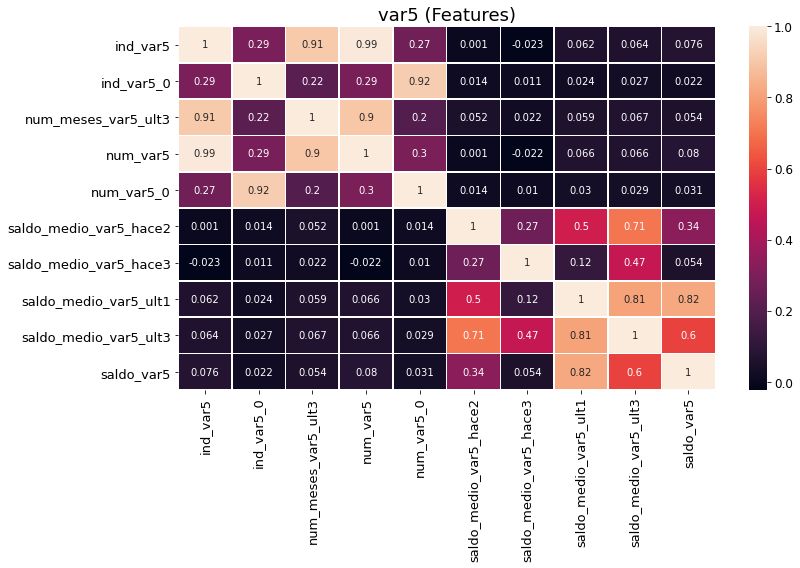

In [53]:
# Analisando a correlação entre as features relacionadas a "var5":
ptlib.plot_corr_features(df=train_df, features=feat_groupby_vars['var5'], digits=3, title="var5 (Features)",
                         title_fontsize=18, xtick_labelsize=13, ytick_labelsize=13, width=12, height=8,
                         figure_id='plot_corr_features_var5', figure_path=PROJECT_IMG_PATH,
                         figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                        )

**Análise:** Observando a **correlação entre as features** (**plot acima**) concluímos que:

1. **`ind_var5 x num_meses_var5_ult3`** possuem uma **alta correlação positiva** (**`correlação = 0.91`**);
2. **`ind_var5 x num_var_5`** são **colineares**, pois representam a mesma informação (**`correlação = 0.99`**);
3. **`ind_var5_0 x num_var_5_0`** possuem uma **alta correlação positiva** (**`correlação = 0.92`**);
4. **`num_meses_var5_ult3 x num_var_5`** possuem uma **alta correlação positiva** (**`correlação = 0.90`**);
5. **`saldo_medio_var5_hace2 x saldo_medio_var5_ult3`** possuem uma **alta correlação positiva** (**`correlação = 0.71`**);
6. **`saldo_medio_var5_ult1 x saldo_medio_var5_ult3`** possuem uma **alta correlação positiva** (**`correlação = 0.81`**);
7. **`saldo_medio_var5_ult1 x saldo_var5`** possuem uma **alta correlação positiva** (**`correlação = 0.82`**).

Agora, vamos plotar as contagens de observações de cada categoria da feature **`num_meses_var5_ult3`**:

Saving figure: plot_count_num_meses_var5_ult3


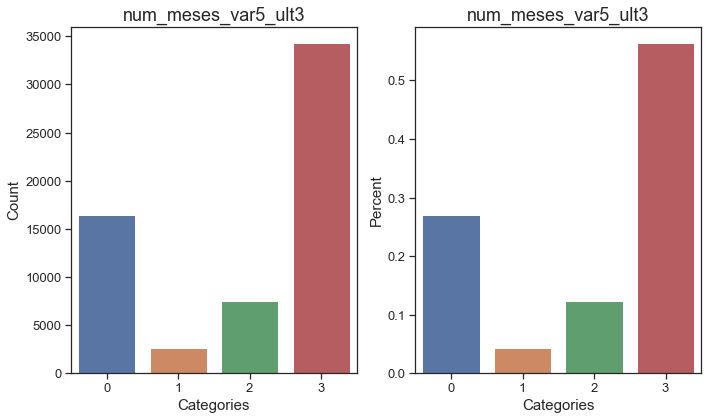

,num_meses_var5_ult3,Total,Percent
0,0,16414,0.2699
1,1,2635,0.0433
2,2,7492,0.1232
3,3,34275,0.5636


In [54]:
# Agora, vamos plotar as contagens de observações e as proporções de cada classe da nossa feature:
ptlib.plot_percent_count_feature(df=train_df, feature='num_meses_var5_ult3', plot_style='ticks',
                                 title='num_meses_var5_ult3', title_fontsize=18, title_share=False,
                                 xlabel1="Categories", xlabel1_fontsize=15, xlabel2="Categories", xlabel2_fontsize=15,
                                 ylabel_fontsize=15, columns_nr=2, rows_nr=1, share_x=False, share_y=False,
                                 width=10, height=6, xtick_labelsize=13, ytick_labelsize=13, wspace=None, hspace=None,
                                 figure_id='plot_count_num_meses_var5_ult3', figure_path=PROJECT_IMG_PATH,
                                 figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                )

**Análise:** podemos observar que **`56.36%`** das observações do nosso dataset de treinamento estão classificados na categoria **`3`**. Portanto, está **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

Agora, vamos analisar, para as features **`saldo_medio_var5_hace2`**, **`saldo_medio_var5_hace3`**, **`saldo_medio_var5_ult1`**, **`saldo_medio_var5_ult3`** e **`saldo_var5`** , as suas distribuições de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_histograms_var5


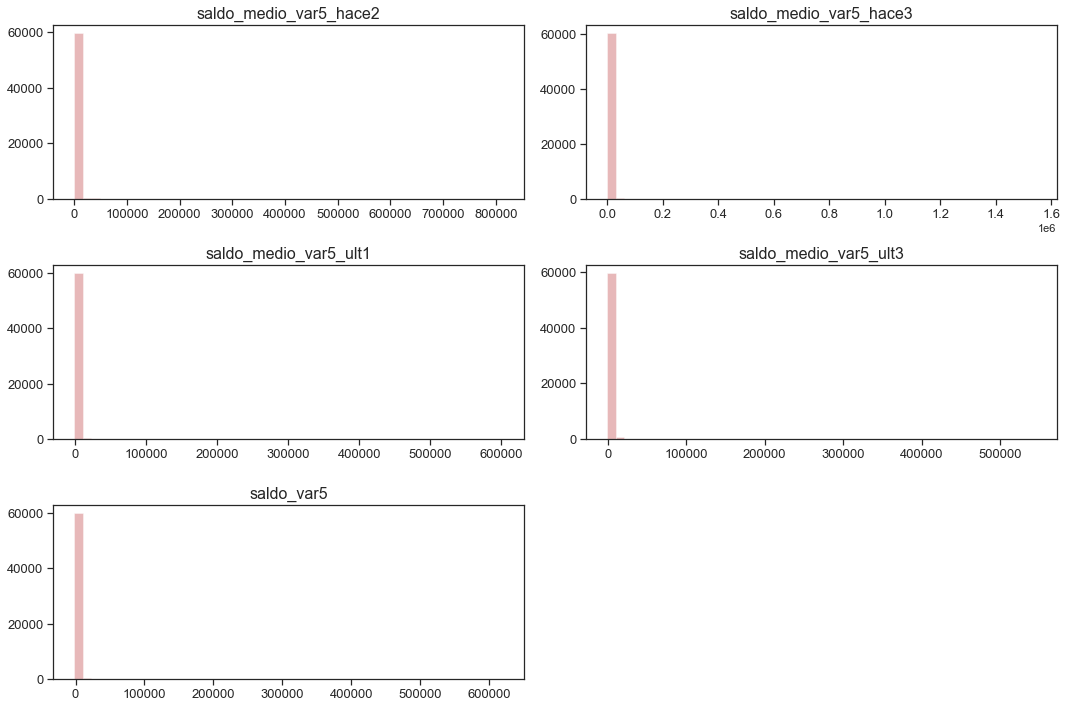

In [55]:
# Desenhando os histogramas para as features 'num_meses_var5_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
# 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', e 'saldo_var5':

# Features:
feats = ['saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1',
        'saldo_medio_var5_ult3', 'saldo_var5']

# Histogramas:
ptlib.plot_histograms_features(df=train_df, features=feats, plot_style='ticks', kde=False, colors='r',
                               titles=feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                               ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                               cols_nr=2, rows_nr=3, width=15, height=10, wspace=None, hspace=None,
                               figure_id="plot_histograms_var5", figure_path=PROJECT_IMG_PATH,
                               figure_file_format="png", figure_file_extension=".png",
                               tight_layout=True, dpi=300
                              )

Saving figure: plot_boxplots_var5


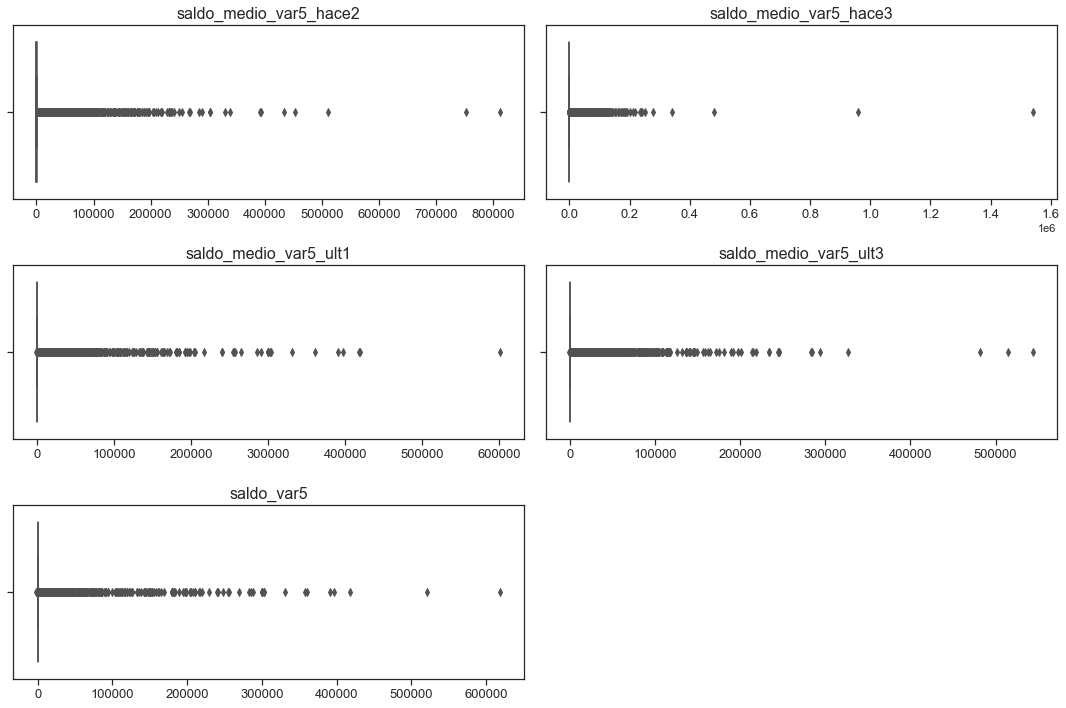

In [56]:
# Desenhando os boxplots para as features 'num_meses_var5_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
# 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', e 'saldo_var5':

# Features:
feats = ['saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1',
        'saldo_medio_var5_ult3', 'saldo_var5']

# BoxPlots:
ptlib.plot_boxplots_features(df=train_df, features=feats, plot_style='ticks', colors='r',
                             orient='h', saturation=0.75,
                             titles=feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                             ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                             cols_nr=2, rows_nr=3, width=15, height=10, wspace=None, hspace=None,
                             figure_id="plot_boxplots_var5", figure_path=PROJECT_IMG_PATH,
                             figure_file_format="png", figure_file_extension=".png",
                             tight_layout=True, dpi=300
                            )

**Análise:**

1. Na feature `saldo_medio_var5_hace2`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores negativos e acima de `100`**. No relatório de *percentis*, podemos notar que existe um *pico* de observações (**`31%`**) com valores iguais a `3`. Também podemos observar que `97%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `10000`**, conforme podemos observar no *histograma* e no relatório de *percentis*;

2. Na feature `saldo_medio_var5_hace3`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores negativos e acima de `100`**. No relatório de *percentis*, podemos notar que existe um *pico* de observações (**`39%`**) com valores iguais a `0`. Também podemos observar que `96%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `2000`**, conforme podemos observar no *histograma* e no relatório de *percentis*;

3. Na feature `saldo_medio_var5_ult1`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores negativos e acima de `1000`**. No relatório de *percentis*, podemos notar que existe um *pico* de observações (**`32%`**) com valores iguais a `0`. Também podemos observar que `90%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `1000`**, conforme podemos observar no *histograma* e no relatório de *percentis*;

4. Na feature `saldo_medio_var5_ult3`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores negativos e acima de `1000`**. No relatório de *percentis*, podemos notar que existe um *pico* de observações (**`32%`**) com valores iguais a `0`. Também podemos observar que `90%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `1000`**, conforme podemos observar no *histograma* e no relatório de *percentis*;

5. Na feature `saldo_var5`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores negativos e acima de `1000`**. No relatório de *percentis*, podemos notar que existe um *pico* de observações (**`34%`**) com valores iguais a `0`. Também podemos observar que `90%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `1000`**, conforme podemos observar no *histograma* e no relatório de *percentis*.

**Conclusão:** Portanto, entendemos que as **features** **`ind_var5`** (colinear com a feature **`num_var5`**), **`ind_var5_0`** e **`num_var5_0`** **são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [57]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var5'])                   # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var5_0'])                 # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var5'])                 # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var5_0'])               # Quantitativa Discreta.
santander_feat_info.save(key='Categorical', features=['num_meses_var5_ult3'])   # Qualitativa Nominal.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var5_hace2']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var5_hace3']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var5_ult1'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var5_ult3'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var5'])             # Quantitativa Contínua.
santander_feat_info.save(key='Outliers', features=['saldo_medio_var5_hace2'])   # Variável têm "Outliers".
santander_feat_info.save(key='Outliers', features=['saldo_medio_var5_hace3'])   # Variável têm "Outliers".
santander_feat_info.save(key='Outliers', features=['saldo_medio_var5_ult1'])    # Variável têm "Outliers".
santander_feat_info.save(key='Outliers', features=['saldo_medio_var5_ult3'])    # Variável têm "Outliers".
santander_feat_info.save(key='Outliers', features=['saldo_var5'])               # Variável têm "Outliers".
santander_feat_info.save(key='Irrelevant', features=['ind_var5', 'ind_var5_0',
                                                     'num_var5_0'])             # Irrelevantes.

## var8

In [58]:
# Resumo das informações:
train_df[feat_groupby_vars['var8']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 10 columns):
ind_var8                  60816 non-null int64
ind_var8_0                60816 non-null int64
num_meses_var8_ult3       60816 non-null int64
num_var8                  60816 non-null int64
num_var8_0                60816 non-null int64
saldo_medio_var8_hace2    60816 non-null float64
saldo_medio_var8_hace3    60816 non-null float64
saldo_medio_var8_ult1     60816 non-null float64
saldo_medio_var8_ult3     60816 non-null float64
saldo_var8                60816 non-null float64
dtypes: float64(5), int64(5)
memory usage: 4.6 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [59]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var8']].describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var8,60816.0,0.028562,0.166572,0.00,0.0,0.0,0.0,1.00
ind_var8_0,60816.0,0.032935,0.178469,0.00,0.0,0.0,0.0,1.00
num_meses_var8_ult3,60816.0,0.053522,0.334357,0.00,0.0,0.0,0.0,3.00
num_var8,60816.0,0.085685,0.499716,0.00,0.0,0.0,0.0,3.00
num_var8_0,60816.0,0.098856,0.535812,0.00,0.0,0.0,0.0,6.00
saldo_medio_var8_hace2,60816.0,72.059624,1870.405196,-287.67,0.0,0.0,0.0,231351.99
saldo_medio_var8_hace3,60816.0,9.595272,481.561337,0.00,0.0,0.0,0.0,73362.24
saldo_medio_var8_ult1,60816.0,129.412427,2268.032588,-3401.34,0.0,0.0,0.0,228031.80
saldo_medio_var8_ult3,60816.0,113.547998,1945.458121,-1844.52,0.0,0.0,0.0,177582.00
saldo_var8,60816.0,147.164810,2638.277572,-4942.26,0.0,0.0,0.0,240045.00


In [60]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var8'], percent_range=range(95, 101, 1))
result.T

Percentile,95%,96%,97%,98%,99%,100%
ind_var8,0.0,0.0,0.0,1.000,1.0000,1.00
ind_var8_0,0.0,0.0,1.0,1.000,1.0000,1.00
num_meses_var8_ult3,0.0,0.0,0.0,1.000,2.0000,3.00
num_var8,0.0,0.0,0.0,3.000,3.0000,3.00
num_var8_0,0.0,0.0,3.0,3.000,3.0000,6.00
saldo_medio_var8_hace2,0.0,0.0,0.0,0.000,756.3660,231351.99
saldo_medio_var8_hace3,0.0,0.0,0.0,0.000,0.0000,73362.24
saldo_medio_var8_ult1,0.0,0.0,0.0,520.188,2391.5925,228031.80
saldo_medio_var8_ult3,0.0,0.0,0.0,493.092,2091.5670,177582.00
saldo_var8,0.0,0.0,0.0,404.460,3100.4985,240045.00


In [61]:
# Vamos verificar a proporção dos valores para as variáveis categóricas relacionadas a "var8":
for feat in feat_groupby_vars['var8']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

          Total  Percent
ind_var8                
0         59079   0.9714
1          1737   0.0286

            Total  Percent
ind_var8_0                
0           58813   0.9671
1            2003   0.0329

                     Total  Percent
num_meses_var8_ult3                
0                    59045   0.9709
2                      734   0.0121
1                      662   0.0109
3                      375   0.0062

          Total  Percent
num_var8                
0         59079   0.9714
3          1737   0.0286

            Total  Percent
num_var8_0                
0           58813   0.9671
3            2002   0.0329
6               1   0.0000

                        Total  Percent
saldo_medio_var8_hace2                
0.00                    59703   0.9817
3.00                       13   0.0002
15.00                       9   0.0001
30.00                       9   0.0001
60.00                       6   0.0001
...                       ...      ...
504.12                  

**Análise:**

1. As **`features`** **`ind_var8`**, e **`ind_var8_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas categorias **`0`** e **`1`**;

2. A **`feature`** **`num_meses_var8_ult3`** é uma variável do tipo `Categórica Nominal`, com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As **`features`** **`num_var8`** e **`num_var8_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`saldo_medio_var8_hace2`**, **`saldo_medio_var8_hace3`**, **`saldo_medio_var8_ult1`**, **`saldo_medio_var8_ult3`** e **`saldo_var8`** são variáveis do tipo `Quantitativas Contínuas`;

Observando os relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var8`** e **`ind_var8_0`**, observamos que **`97%`** e **`96%`**, respectivamente, das observações pertencem a categoria **`0`**;

2. Para a feature **`num_meses_var8_ult3`**, observamos que **`97.09%`** das observações pertencem a categoria **`0`**;

3. Para a feature **`num_var8`**, observamos que **`97.14%`** das observações possuem valores iguais a **`0`**, enquanto que para a feature **`num_var8_0`**, observamos que **`96.78%`** das observações possuem valores iguais a **`0`**;

4. Para as features **`saldo_medio_var8_hace2`** e **`saldo_medio_var8_hace3`**, observamos que **`98.17%`** e **`99.37%`**, respectivamente, das observações possuem valores iguais a **`0`**;

5. Para as features **`saldo_medio_var8_ult1`**, **`saldo_medio_var8_ult3`**, e **`saldo_var8`**, observamos que **`97.11%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [62]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var8'])                   # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var8_0'])                 # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var8'])                 # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var8_0'])               # Quantitativa Discreta.
santander_feat_info.save(key='Categorical', features=['num_meses_var8_ult3'])   # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var8_hace2']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var8_hace3']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var8_ult1'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var8_ult3'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var8'])             # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var8'])  # Irrelevantes.

## var12

In [63]:
# Resumo das informações:
train_df[feat_groupby_vars['var12']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 10 columns):
ind_var12                  60816 non-null int64
ind_var12_0                60816 non-null int64
num_meses_var12_ult3       60816 non-null int64
num_var12                  60816 non-null int64
num_var12_0                60816 non-null int64
saldo_medio_var12_hace2    60816 non-null float64
saldo_medio_var12_hace3    60816 non-null float64
saldo_medio_var12_ult1     60816 non-null float64
saldo_medio_var12_ult3     60816 non-null float64
saldo_var12                60816 non-null float64
dtypes: float64(5), int64(5)
memory usage: 4.6 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [64]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var12']].describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var12,60816.0,0.045646,0.208718,0.0,0.0,0.0,0.0,1.00
ind_var12_0,60816.0,0.067548,0.250971,0.0,0.0,0.0,0.0,1.00
num_meses_var12_ult3,60816.0,0.102358,0.488120,0.0,0.0,0.0,0.0,3.00
num_var12,60816.0,0.138664,0.639458,0.0,0.0,0.0,0.0,15.00
num_var12_0,60816.0,0.211770,0.913433,0.0,0.0,0.0,0.0,111.00
saldo_medio_var12_hace2,60816.0,4096.794969,39611.906016,0.0,0.0,0.0,0.0,3000538.14
saldo_medio_var12_hace3,60816.0,632.316635,9593.663815,0.0,0.0,0.0,0.0,668335.32
saldo_medio_var12_ult1,60816.0,5827.253046,47896.606515,0.0,0.0,0.0,0.0,3004185.60
saldo_medio_var12_ult3,60816.0,4479.855335,36490.146302,0.0,0.0,0.0,0.0,2272859.43
saldo_var12,60816.0,6145.564185,49769.859318,0.0,0.0,0.0,0.0,3008077.32


In [65]:
# Obtendo os percentis a partir de "90%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var12'], percent_range=range(90, 101, 1))
result.T

Percentile,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
ind_var12,0.0,0.0,0.0,0.0,0.0,0.0,1.000,1.0000,1.000,1.000,1.00
ind_var12_0,0.0,0.0,0.0,0.0,1.0,1.0,1.000,1.0000,1.000,1.000,1.00
num_meses_var12_ult3,0.0,0.0,0.0,0.0,0.0,0.0,1.000,2.0000,2.000,3.000,3.00
num_var12,0.0,0.0,0.0,0.0,0.0,0.0,3.000,3.0000,3.000,3.000,15.00
num_var12_0,0.0,0.0,0.0,0.0,3.0,3.0,3.000,3.0000,3.000,3.000,111.00
saldo_medio_var12_hace2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,8286.1965,48312.237,134966.766,3000538.14
saldo_medio_var12_hace3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.000,7741.920,668335.32
saldo_medio_var12_ult1,0.0,0.0,0.0,0.0,0.0,0.0,2354.556,31051.9005,90311.634,195182.220,3004185.60
saldo_medio_var12_ult3,0.0,0.0,0.0,0.0,0.0,0.0,1908.204,24564.3915,72037.632,150496.509,2272859.43
saldo_var12,0.0,0.0,0.0,0.0,0.0,0.0,3000.000,36023.5395,99061.020,210000.000,3008077.32


In [66]:
# Vamos verificar a proporção dos valores para as variáveis categóricas relacionadas a "var12":
for feat in feat_groupby_vars['var12']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var12                
0          58040   0.9544
1           2776   0.0456

             Total  Percent
ind_var12_0                
0            56708   0.9325
1             4108   0.0675

                      Total  Percent
num_meses_var12_ult3                
0                     58019   0.9540
2                      1382   0.0227
3                      1023   0.0168
1                       392   0.0064

           Total  Percent
num_var12                
0          58040   0.9544
3           2744   0.0451
6             31   0.0005
15             1   0.0000

             Total  Percent
num_var12_0                
0            56708   0.9325
3             3964   0.0652
6              139   0.0023
9                3   0.0000
15               1   0.0000
111              1   0.0000

                         Total  Percent
saldo_medio_var12_hace2                
0.00                     58408   0.9604
180000.00                    6   0.0001
150000.00        

**Análise:**

1. As **`features`** **`ind_var12`**, e **`ind_var12_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas categorias **`0`** e **`1`**;

2. A **`feature`** **`num_meses_var12_ult3`** é uma variável do tipo `Categórica Nominal`, com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As **`features`** **`num_var12`** e **`num_var12_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`saldo_medio_var12_hace2`**, **`saldo_medio_var12_hace3`**, **`saldo_medio_var12_ult1`**, **`saldo_medio_var12_ult3`** e **`saldo_var12`** são variáveis do tipo `Quantitativas Contínuas`;

Observando os relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var12`** e **`ind_var12_0`**, observamos que **`95.44%`** e **`93.25%`**, respectivamente, das observações pertencem a classe **`0`**;

2. Para a feature **`num_meses_var12_ult3`**, observamos que **`95.40%`** das observações pertencem a categoria **`0`**;

3. Para a feature **`num_var12`**, observamos que **`95.44%`** das observações possuem valores iguais a **`0`**, enquanto que para a feature **`num_var12_0`**, observamos que **`93.25%`** das observações possuem valores iguais a **`0`**;

4. Para as features **`saldo_medio_var12_hace2`** e **`saldo_medio_var12_hace3`**, observamos que **`96.04%`** e **`98.31%`**, respectivamente, das observações possuem valores iguais a **`0`**;

5. Para as features **`saldo_medio_var12_ult1`**, **`saldo_medio_var12_ult3`**, e **`saldo_var12`**, observamos que **`95%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [67]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var12'])                   # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var12_0'])                 # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var12'])                 # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var12_0'])               # Quantitativa Discreta.
santander_feat_info.save(key='Categorical', features=['num_meses_var12_ult3'])   # Qualitativa Nominal.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var12_hace2']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var12_hace3']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var12_ult1'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var12_ult3'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var12'])             # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var12'])  # Irrelevantes.

## var29

In [68]:
# Resumo das informações:
train_df[feat_groupby_vars['var29']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 10 columns):
ind_var29                  60816 non-null int64
ind_var29_0                60816 non-null int64
num_meses_var29_ult3       60816 non-null int64
num_var29                  60816 non-null int64
num_var29_0                60816 non-null int64
saldo_medio_var29_hace2    60816 non-null float64
saldo_medio_var29_hace3    60816 non-null float64
saldo_medio_var29_ult1     60816 non-null float64
saldo_medio_var29_ult3     60816 non-null float64
saldo_var29                60816 non-null float64
dtypes: float64(5), int64(5)
memory usage: 4.6 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [69]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var29']].describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var29,60816.0,0.000033,0.005735,0.0,0.0,0.0,0.0,1.00
ind_var29_0,60816.0,0.000132,0.011469,0.0,0.0,0.0,0.0,1.00
num_meses_var29_ult3,60816.0,0.000132,0.015172,0.0,0.0,0.0,0.0,2.00
num_var29,60816.0,0.000099,0.017204,0.0,0.0,0.0,0.0,3.00
num_var29_0,60816.0,0.000395,0.034406,0.0,0.0,0.0,0.0,3.00
saldo_medio_var29_hace2,60816.0,0.266339,46.756603,0.0,0.0,0.0,0.0,10430.01
saldo_medio_var29_hace3,60816.0,0.002388,0.588786,0.0,0.0,0.0,0.0,145.20
saldo_medio_var29_ult1,60816.0,0.317384,58.225764,0.0,0.0,0.0,0.0,13793.67
saldo_medio_var29_ult3,60816.0,0.233287,35.642179,0.0,0.0,0.0,0.0,7331.34
saldo_var29,60816.0,0.518094,92.904907,0.0,0.0,0.0,0.0,19531.80


In [70]:
# Obtendo os percentis a partir de "90%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var29'], percent_range=range(90, 101, 1))
result.T

Percentile,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
ind_var29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
ind_var29_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
num_meses_var29_ult3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
num_var29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00
num_var29_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00
saldo_medio_var29_hace2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10430.01
saldo_medio_var29_hace3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.20
saldo_medio_var29_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13793.67
saldo_medio_var29_ult3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7331.34
saldo_var29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19531.80


In [71]:
# Vamos verificar a proporção dos valores para as variáveis categóricas relacionadas a "var29":
for feat in feat_groupby_vars['var29']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var29                
0          60814      1.0
1              2      0.0

             Total  Percent
ind_var29_0                
0            60808   0.9999
1                8   0.0001

                      Total  Percent
num_meses_var29_ult3                
0                     60811   0.9999
2                         3   0.0000
1                         2   0.0000

           Total  Percent
num_var29                
0          60814      1.0
3              2      0.0

             Total  Percent
num_var29_0                
0            60808   0.9999
3                8   0.0001

                         Total  Percent
saldo_medio_var29_hace2                
0.00                     60812   0.9999
59.97                        1   0.0000
868.98                       1   0.0000
4838.70                      1   0.0000
10430.01                     1   0.0000

                         Total  Percent
saldo_medio_var29_hace3                
0.0              

**Análise:**

1. As **`features`** **`ind_var29`**, e **`ind_var29_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas categorias **`0`** e **`1`**;

2. A **`feature`** **`num_meses_var29_ult3`** é uma variável do tipo `Categórica Nominal`, com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As **`features`** **`num_var29`** e **`num_var29_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`saldo_medio_var29_hace2`**, **`saldo_medio_var29_hace3`**, **`saldo_medio_var29_ult1`**, **`saldo_medio_var29_ult3`** e **`saldo_var29`** são variáveis do tipo `Quantitativas Contínuas`;

Observando os relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var29`** e **`ind_var29_0`**, observamos que **`100%`** e **`99.99%`** das observações, respectivamente, pertencem a classe **`0`**;

2. Para a feature **`num_meses_var29_ult3`**, observamos que **`99.99%`** das observações pertencem a categoria **`0`**;

3. Para as features **`num_var29`** e **`num_var29_0`**, observamos que **`100%`** e **`99.99%`** das observações, respectivamente, possuem valores iguais a **`0`**;

4. Para as features **`saldo_medio_var29_hace2`**, **`saldo_medio_var29_hace3`**, **`saldo_medio_var29_ult1`**, **`saldo_medio_var29_ult3`**, e **`saldo_var29`**, observamos que **`99.99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [72]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Binary', features=['ind_var29'])                   # Categórica Nominal Binária.
santander_feat_info.save(key='Binary', features=['ind_var29_0'])                 # Categórica Nominal Binária.
santander_feat_info.save(key='Discrete', features=['num_var29'])                 # Quantitativa Discreta.
santander_feat_info.save(key='Discrete', features=['num_var29_0'])               # Quantitativa Discreta.
santander_feat_info.save(key='Categorical', features=['num_meses_var29_ult3'])   # Quantitativa Discreta.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var29_hace2']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var29_hace3']) # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var29_ult1'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_medio_var29_ult3'])  # Quantitativa Contínua.
santander_feat_info.save(key='Continuous', features=['saldo_var29'])             # Quantitativa Contínua.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var29'])  # Irrelevantes.

In [73]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 178


## 04- Salvando informações (`objetos`) importantes, encontradas nesta etapa:

Agora, vamos salvar os seguintes `objetos` importantes, que serão utilizados nas próximas etapas, saber:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [74]:
# Salvando o objeto "feat_groupby_vars":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle", object_name=feat_groupby_vars,
                          msg="The 'feat_groupby_vars' object has been successfully saved!")

# Salvando o objeto "vars_groupby_featcount":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle", object_name=vars_groupby_featcount,
                          msg="The 'vars_groupby_featcount' object has been successfully saved!")

# Salvando o objeto "santander_feat_info":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle", object_name=santander_feat_info,
                          msg="The 'santander_feat_info' object has been successfully saved!")

The 'feat_groupby_vars' object has been successfully saved!
The 'vars_groupby_featcount' object has been successfully saved!
The 'santander_feat_info' object has been successfully saved!


## <font color='black'>FIM</font>